In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
spring = pd.read_csv(r"C:\Users\Matt\Desktop\Data Science\League of Legends Betting\2020 spring match data.csv")
summer = pd.read_csv(r"C:\Users\Matt\Desktop\Data Science\League of Legends Betting\2020 summer match data.csv")
df = pd.concat([spring, summer])
df

,gameid,url,league,split,date,game,patch,playerid,side,position,...,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,firstherald
0,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 9:22,1,10.01,1,Blue,top,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 9:22,1,10.01,2,Blue,jng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 9:22,1,10.01,3,Blue,mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 9:22,1,10.01,4,Blue,bot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 9:22,1,10.01,5,Blue,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,6597-8305,https://lpl.qq.com/es/stats.shtml?bmid=6597,LPL,2020-2,7/10/2020 12:16,1,10.13,8,Red,mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6044,6597-8305,https://lpl.qq.com/es/stats.shtml?bmid=6597,LPL,2020-2,7/10/2020 12:16,1,10.13,9,Red,bot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6045,6597-8305,https://lpl.qq.com/es/stats.shtml?bmid=6597,LPL,2020-2,7/10/2020 12:16,1,10.13,10,Red,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6046,6597-8305,https://lpl.qq.com/es/stats.shtml?bmid=6597,LPL,2020-2,7/10/2020 12:16,1,10.13,100,Blue,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
teams = df.loc[df['position'] == 'team']
teams

,gameid,url,league,split,date,game,patch,playerid,side,position,...,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,firstherald
10,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 9:22,1,10.01,100,Blue,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 9:22,1,10.01,200,Red,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,5655-7250,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 10:37,2,10.01,100,Blue,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,5655-7250,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 10:37,2,10.01,200,Red,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,5656-7252,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,1/13/2020 11:26,1,10.01,100,Blue,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,6596-8302,https://lpl.qq.com/es/stats.shtml?bmid=6596,LPL,2020-2,7/10/2020 11:15,3,10.13,200,Red,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6034,ESPORTSTMNT03/1404129,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2020-2,7/10/2020 11:42,2,10.13,100,Blue,team,...,25905.0,30036.0,547.0,22558.0,27787.0,468.0,3347.0,2249.0,79.0,1.0
6035,ESPORTSTMNT03/1404129,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2020-2,7/10/2020 11:42,2,10.13,200,Red,team,...,22558.0,27787.0,468.0,25905.0,30036.0,547.0,-3347.0,-2249.0,-79.0,0.0
6046,6597-8305,https://lpl.qq.com/es/stats.shtml?bmid=6597,LPL,2020-2,7/10/2020 12:16,1,10.13,100,Blue,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
teams = teams[['team', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'gamelength', 'result', 'kills', 'deaths', 'assists',
               'teamkills', 'teamdeaths', 'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood', 
               'team kpm', 'ckpm', 'dragons', 'opp_dragons', 'barons', 'opp_barons', 'firsttower', 'towers', 'opp_towers', 
               'damagetochampions', 'dpm', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm','controlwardsbought', 'totalgold', 
               'earnedgold', 'earned gpm', 'total cs', 'minionkills', 'monsterkills', 'monsterkillsownjungle', 
               'monsterkillsenemyjungle', 'cspm']].reset_index()

teams

,index,team,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,...,controlwardsbought,totalgold,earnedgold,earned gpm,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm
0,10,Invictus Gaming,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,28,...,51.0,82426,54120,1230.0000,1237.0,961.0,276.0,186.0,18.0,28.1136
1,11,FunPlus Phoenix,Aphelios,Akali,Lucian,Varus,Xayah,2640,0,29,...,75.0,75178,46872,1065.2727,1146.0,843.0,303.0,204.0,25.0,26.0455
2,22,Invictus Gaming,Pantheon,Nautilus,Rumble,Ryze,Leona,1814,0,11,...,32.0,50074,30193,998.6659,934.0,746.0,188.0,140.0,12.0,30.8931
3,23,FunPlus Phoenix,Aphelios,Akali,Lucian,Elise,Gragas,1814,1,19,...,40.0,56648,36767,1216.1080,945.0,729.0,216.0,129.0,15.0,31.2569
4,34,LGD Gaming,Pantheon,Elise,Rumble,Mordekaiser,Ornn,2283,1,17,...,42.0,64849,40184,1056.0841,1144.0,952.0,192.0,137.0,8.0,30.0657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,6023,Bilibili Gaming,Varus,Lee Sin,Kalista,Renekton,Jayce,1834,1,23,...,47.0,58894,38809,1269.6510,884.0,678.0,206.0,106.0,41.0,28.9204
3556,6034,KT Rolster,Olaf,Tahm Kench,Twisted Fate,Sylas,Camille,2244,0,7,...,54.0,60377,36110,965.5080,NaN,1015.0,236.0,172.0,5.0,33.4492
3557,6035,SANDBOX Gaming,Kalista,Sett,Karma,Renekton,Kennen,2244,1,20,...,61.0,69579,45312,1211.5508,NaN,906.0,254.0,145.0,42.0,31.0160
3558,6046,Invictus Gaming,Wukong,Sett,Thresh,Nautilus,Blitzcrank,1985,1,15,...,56.0,58737,37112,1121.7733,1029.0,824.0,205.0,134.0,7.0,31.1033


In [24]:
df2 = teams.groupby('team')[['result', 'kills', 'deaths', 'assists', 'doublekills', 'teamkills', 'teamdeaths', 'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood', 
               'team kpm', 'ckpm', 'dragons', 'opp_dragons', 'barons', 'opp_barons', 'firsttower', 'towers', 'opp_towers', 
               'damagetochampions', 'dpm', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm','controlwardsbought', 'totalgold', 
               'earnedgold', 'earned gpm', 'total cs', 'minionkills', 'monsterkills', 'monsterkillsownjungle', 
               'monsterkillsenemyjungle', 'cspm']].sum().reset_index()

df2

,team,result,kills,deaths,assists,doublekills,teamkills,teamdeaths,doublekills,triplekills,...,controlwardsbought,totalgold,earnedgold,earned gpm,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm
0,100 Thieves,15,379,464,865,39.0,379,464,39.0,3.0,...,1533.0,2034522,1244844,36714.6055,0.0,30429.0,7251.0,4507.0,969.0,1125.6800
1,100 Thieves Academy,13,363,438,835,39.0,363,438,39.0,7.0,...,1304.0,1704121,1050587,31493.6935,0.0,25074.0,5441.0,3461.0,566.0,916.7499
2,1907 Fenerbahçe Esports,24,490,355,1042,61.0,490,355,61.0,8.0,...,1368.0,1972778,1263988,40070.9952,0.0,27914.0,7376.0,4254.0,1174.0,1110.9049
3,5 Ronin,8,252,365,594,21.0,252,365,21.0,3.0,...,990.0,1430845,867034,26132.8679,0.0,21316.0,5362.0,3586.0,406.0,804.8427
4,APK Prince,17,471,624,1076,51.0,471,624,51.0,16.0,...,2151.0,2490480,1524727,43632.3058,0.0,37316.0,8924.0,5978.0,767.0,1341.5708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Vivo Keyd,16,470,543,1036,46.0,470,543,46.0,6.0,...,1469.0,1923310,1195658,36292.3533,0.0,26734.0,6780.0,4313.0,682.0,1025.8256
89,ahq eSports Club,27,500,371,1249,63.0,500,371,63.0,15.0,...,1837.0,2323557,1450185,43901.8719,0.0,33392.0,8909.0,5933.0,667.0,1273.3139
90,eStar,32,942,862,2366,0.0,942,862,0.0,0.0,...,3203.0,3716821,2357853,70084.4240,64752.0,51422.0,13330.0,8648.0,1195.0,1931.2629
91,paiN Gaming,19,457,356,1115,49.0,457,356,49.0,8.0,...,1544.0,1853081,1167315,34582.1020,0.0,26063.0,6595.0,4303.0,616.0,970.1255


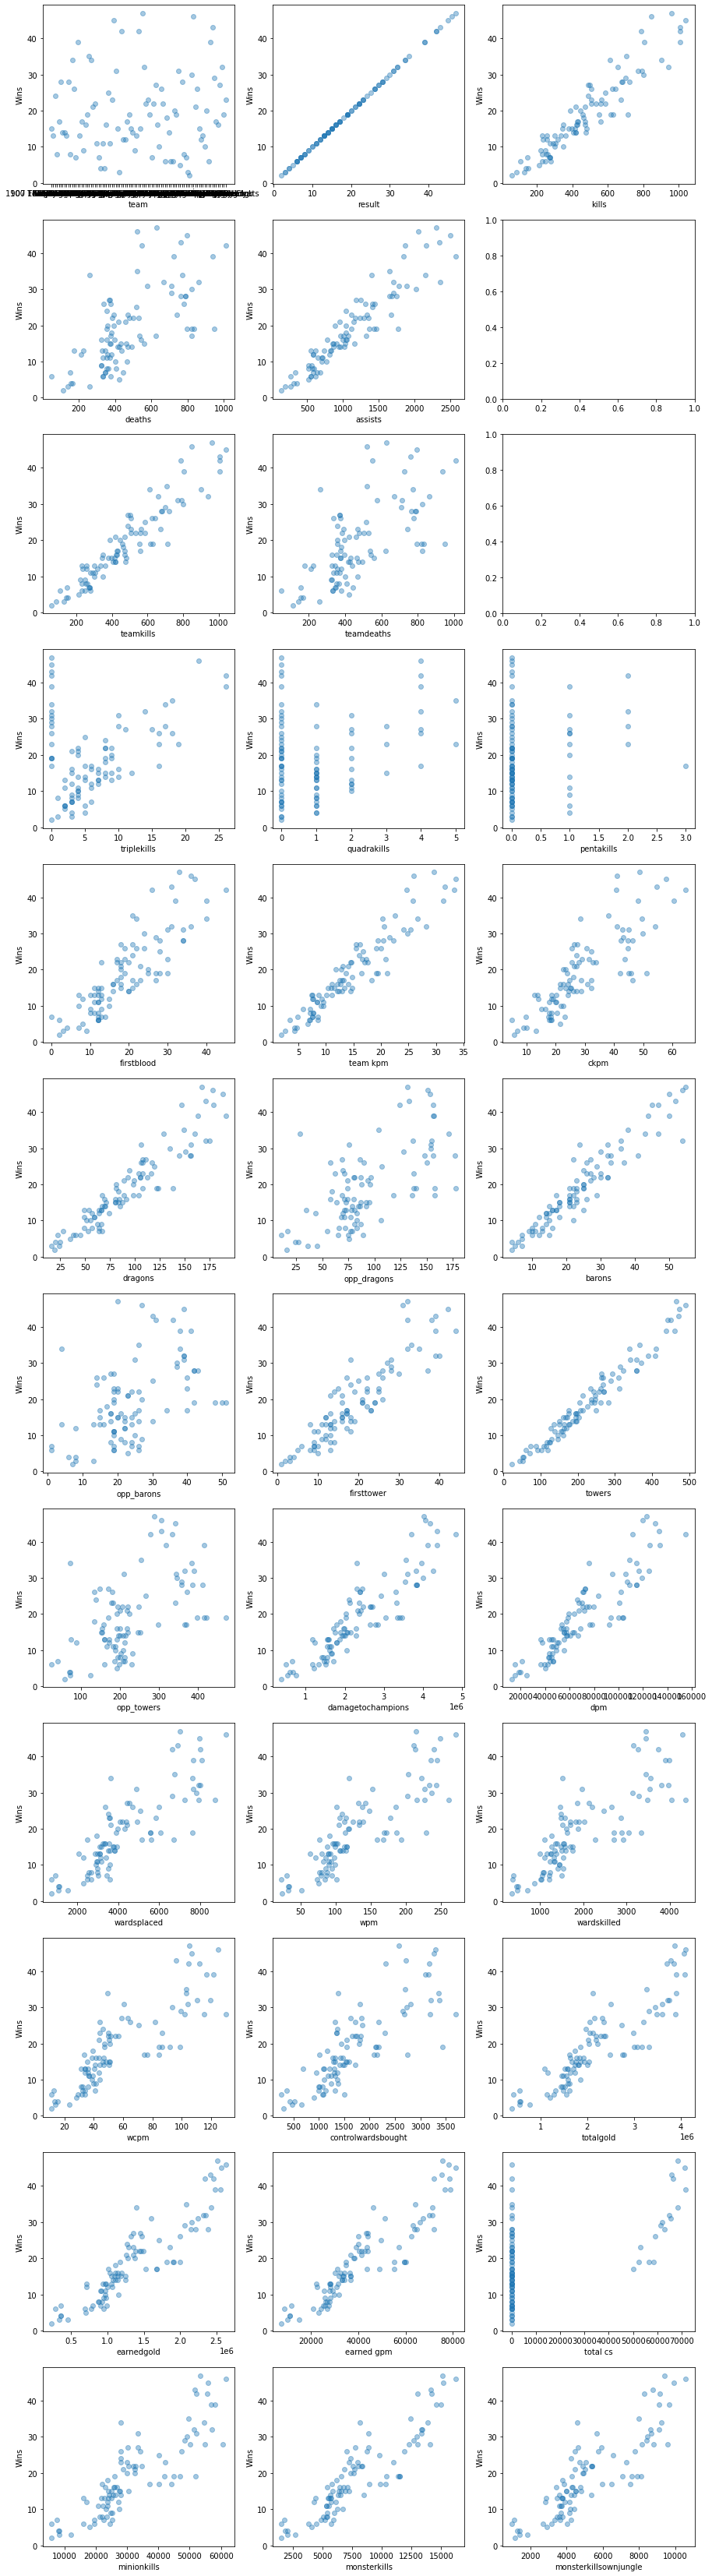

In [25]:
f, ax = plt.subplots(len(df2.columns), 3, figsize=(15,60))

for i in range(len(df2.columns)):
    try:
        plt.subplot(len(df2.columns)/3, 3, i+1)
        plt.scatter(df2[df2.columns[i]], df2['result'], alpha=0.4)

        plt.xlabel(df2.columns[i])
        plt.ylabel('Wins')
    except: ValueError
    pass

1.0 result
0.8716405627284385 kills
0.3329776596117813 deaths
0.8598281837296046 assists
0.8716405627284385 teamkills
0.3329776596117813 teamdeaths
0.2818849872997281 triplekills
0.19333442312095295 quadrakills
0.03416269412574224 pentakills
0.6321022562573411 firstblood
0.8774847152511791 team kpm
0.6651757020474631 ckpm
0.8533448276170852 dragons
0.1574177880685247 opp_dragons
0.8463556071629953 barons
0.12610889876360887 opp_barons
0.7839200191344687 firsttower
0.9703351942736678 towers
0.10667933153171116 opp_towers
0.7779947063741735 damagetochampions
0.79583841297518 dpm
0.6375275275239795 wardsplaced
0.6469048702969054 wpm
0.6060027058769653 wardskilled
0.6189735201895741 wcpm
0.6303340576618965 controlwardsbought
0.7426940406952873 totalgold
0.7888171391767683 earnedgold
0.8040080198453081 earned gpm
-0.26612402184871464 total cs
0.6725177939249349 minionkills
0.7137321773148162 monsterkills
0.6211717698521168 monsterkillsownjungle
0.7772396992275482 monsterkillsenemyjungle
0.6

Text(0, 0.5, 'Predicted Outcome')

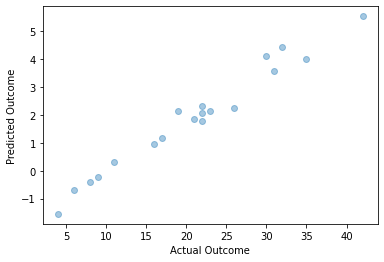

In [26]:
outcome = df2['result']

best_score = 0
best_feature = 0
best_outcome = 0
feature_name = ''

for i in range(len(df2.columns)):
    try:
        features = df2[df2.columns[i]]
        if type(df2[df2.columns[i]][0]) == str: continue
    
        features = features.values.reshape(-1,1)

        train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcome, test_size = 0.2, random_state=5)

        league_lr = LinearRegression()
        league_lr.fit(train_features, train_outcome)

        new_score = league_lr.score(test_features, test_outcome)
        print(new_score, df2.columns[i])
        if new_score > best_score:
            if new_score == 1: continue
            best_score = new_score
            best_feature = test_features
            best_outcome = test_outcome
            feature_name = df2.columns[i]
    except: ValueError
    pass     
            
print(best_score, feature_name)
prediction = league_lr.predict(best_feature)
plt.scatter(best_outcome, prediction, alpha=0.4)

plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

0.9797458889144435
[-1.30043690e-02  2.60200593e-03 -1.30043690e-02  8.34205497e-01
  9.67034350e-02 -5.13608606e-03 -7.75519527e-02  3.88941003e-02
 -2.21557724e-05  6.75480809e-04 -1.36095979e-03 -2.11383227e-05
  7.22382869e-05  3.88941003e-02]


Text(0, 0.5, 'Predicted Outcome')

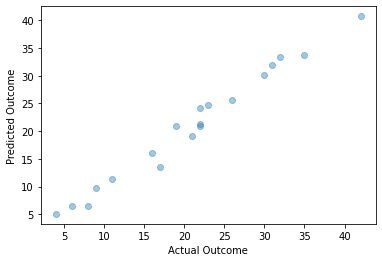

In [28]:
outcome = df2['result']
features = df2[['kills', 'assists', 'teamkills', 'team kpm', 'dragons', 'barons', 'firsttower', 'towers', 
                'damagetochampions', 'dpm', 'earned gpm', 'totalgold', 'earnedgold', 'towers']]

train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcome, test_size = 0.2, random_state=5)

league_lr = LinearRegression()
league_lr.fit(train_features, train_outcome)

print(league_lr.score(test_features, test_outcome))
print(league_lr.coef_)

prediction = league_lr.predict(test_features)
plt.scatter(test_outcome, prediction, alpha=0.4)

plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')